Overall Process

    Reading Source Data and Preprocessing
    Data formatting
    Scaling
    Split the data into Train and test
    Create & Compile model
    Train
    Predict
    Error metrics



In [5]:
#import all necessary libraries
import os
import re
import numpy as np
import pandas as pd
import glob
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [6]:
#Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Reading source data and preprocessing

In [7]:
#read Phenotype metadata file from drive
df = pd.read_csv('/content/gdrive/My Drive/ResearchProject/dat/Phenotypes/Phenotypic_V1_0b_preprocessed1.csv')
replacement= {'FIQ': -99999,'VIQ': -99999,'PIQ': -99999}
df.fillna(value=replacement, inplace = True)
#df

#df['FIQ','VIQ','PIQ'] = df['FIQ','VIQ','PIQ'].fillna(-9999, inplace = True)

In [8]:
#keep only necessary columns
df1 = df[['SUB_ID','SEX','FIQ','VIQ','PIQ','DX_GROUP']]
#df1



In [9]:
df1.shape

(1112, 6)

In [10]:
#read ROI = Region of Interest data file
dir="/content/gdrive/My Drive/ResearchProject/dat/rois_cc200"
files = glob.glob(dir + '/*cc200.1D')
#files = glob.glob(dir + '/NYU*rois_cc200.1D')

df_list = []

for filename in files:
    print(filename)
    df = pd.read_csv(filename,delimiter='\t')
    #add SUB_ID column to the dataframe, based on name of the file
    #df['SUB_ID'] = os.path.basename(filename)[10:15]
    x = re.findall(r'(?<!\d)(\d{7})(?!\d)', filename)
    x = x[0]
    x = x[2:]
    
    df['SUB_ID'] = x
    df_list.append(df)

frame = pd.concat(df_list, axis=0, ignore_index=True)


print(frame)






/content/gdrive/My Drive/ResearchProject/dat/rois_cc200/Pitt_0050040_rois_cc200.1D
/content/gdrive/My Drive/ResearchProject/dat/rois_cc200/Pitt_0050041_rois_cc200.1D
/content/gdrive/My Drive/ResearchProject/dat/rois_cc200/Pitt_0050042_rois_cc200.1D
/content/gdrive/My Drive/ResearchProject/dat/rois_cc200/Pitt_0050043_rois_cc200.1D
/content/gdrive/My Drive/ResearchProject/dat/rois_cc200/Pitt_0050044_rois_cc200.1D
/content/gdrive/My Drive/ResearchProject/dat/rois_cc200/Pitt_0050045_rois_cc200.1D
/content/gdrive/My Drive/ResearchProject/dat/rois_cc200/Pitt_0050046_rois_cc200.1D
/content/gdrive/My Drive/ResearchProject/dat/rois_cc200/Pitt_0050047_rois_cc200.1D
/content/gdrive/My Drive/ResearchProject/dat/rois_cc200/Pitt_0050048_rois_cc200.1D
/content/gdrive/My Drive/ResearchProject/dat/rois_cc200/Pitt_0050049_rois_cc200.1D
/content/gdrive/My Drive/ResearchProject/dat/rois_cc200/Pitt_0050050_rois_cc200.1D
/content/gdrive/My Drive/ResearchProject/dat/rois_cc200/Pitt_0050051_rois_cc200.1D
/con

In [11]:

data_df1 = frame.apply(lambda x: pd.to_numeric(x, errors='coerce'))
#data_df1.head(2)


In [12]:
#merge phenotype data frame with actual dataframe inorder to get additional columns merged
merged = pd.merge(data_df1,df1, left_on='SUB_ID',right_on='SUB_ID',how='inner')
merged.drop('SUB_ID', axis=1, inplace=True)
merged
#merged.shape

,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11,#12,#13,#14,#15,#16,#17,#18,#19,#20,#21,#22,#23,#24,#25,#26,#27,#28,#29,#30,#31,#32,#33,#34,#35,#36,#37,#38,#39,#40,...,#166,#167,#168,#169,#170,#171,#172,#173,#174,#175,#176,#177,#178,#179,#180,#181,#182,#183,#184,#185,#186,#187,#188,#189,#190,#191,#192,#193,#194,#195,#196,#197,#198,#199,#200,SEX,FIQ,VIQ,PIQ,DX_GROUP
0,-2.527179,0.651299,6.139805,9.712024,9.348371,9.717955,7.452845,5.520130,-9.733732,-11.704722,-2.811539,-2.477238,-10.740128,-5.194209,23.072495,13.998918,-11.067687,-13.519666,7.586369,-5.045666,-0.343051,5.785199,7.700728,-7.777389,7.534036,2.458015,15.156469,-4.601303,-11.400248,-5.300548,7.150731,9.965609,-0.067945,3.119822,-3.968903,-12.384932,4.513433,-4.274536,-10.050265,-5.120993,...,-4.263603,-3.488760,-0.881957,-15.964636,-1.942599,21.592020,6.738096,-8.920920,4.923290,-8.722207,-4.655347,-13.217188,-10.228355,1.981391,19.923058,14.756038,-14.496258,-11.950688,-18.334618,-2.731386,-3.536633,-11.017577,-1.450911,1.513373,4.479580,-6.246619,-10.872802,-4.804395,-0.969079,-4.726086,-18.176473,8.684643,8.516290,12.295730,-2.936834,1,110.0,109.0,108.0,2
1,-0.672059,-3.709695,14.256647,7.924699,13.623257,8.989123,2.165522,14.556416,-13.244122,-17.281932,-3.313530,-2.326442,-19.473096,-12.799921,24.569243,19.374087,-17.294446,-7.334671,16.877504,-14.335878,1.963690,13.899066,8.838393,-9.116989,14.098928,3.054835,16.896675,-3.598718,-9.144253,-9.229350,13.363583,3.603074,-6.019007,8.214756,-1.374910,-16.479359,2.219439,-9.191128,-17.061260,-9.612053,...,-6.381493,-10.801009,-3.353275,-13.304958,-0.524543,41.020037,7.401693,-14.115564,14.037549,-6.542787,-3.442815,-19.400244,-10.189655,6.943327,32.024586,9.768006,-16.912491,-12.510700,-27.698821,-6.802719,-8.837045,-27.830675,1.549057,2.287328,0.914330,-6.166705,-9.977123,-8.792095,3.374584,-4.552500,-31.288757,8.987093,9.916259,19.670720,-6.856685,1,110.0,109.0,108.0,2
2,1.786198,-10.780776,23.152732,3.594190,14.821097,4.084466,-7.256359,12.695596,-12.003007,-14.188406,-5.265418,-2.336440,-19.900973,-17.747157,21.509092,17.397852,-17.964532,6.676088,20.279793,-20.612307,0.164210,20.073173,6.592266,-11.841863,17.810671,2.890722,11.807938,-4.678396,-3.101206,-9.548367,13.086320,-6.079047,-13.357350,9.915806,2.252586,-12.450819,-0.073725,-14.236765,-21.296564,-9.636979,...,-6.095395,-14.245915,-5.697632,-5.043302,-0.019429,41.166573,3.742577,-17.794618,24.532902,-2.170510,1.127761,-20.557645,-3.849773,7.474742,30.197919,1.360148,-14.940056,-6.688197,-28.649245,-12.278442,-9.080073,-37.227495,0.467673,1.932047,-0.750090,-4.495337,-4.145796,-6.338700,8.125710,-4.183747,-37.144902,4.937502,7.407285,26.731890,-14.037814,1,110.0,109.0,108.0,2
3,3.450363,-17.369489,28.938699,0.951497,12.866473,-2.742610,-17.600806,-1.479960,-5.599236,-3.130851,-9.262439,-2.662951,-10.907427,-18.434372,15.439519,7.496057,-13.297631,22.051092,15.624931,-20.259216,-5.531264,20.927427,1.204132,-14.933854,16.217644,1.207182,2.490078,-8.508698,3.312344,-5.640125,4.956696,-13.344020,-17.376958,5.159607,5.530601,-1.104301,-0.172092,-18.433144,-22.079262,-4.248069,...,-4.456124,-10.742516,-7.255472,4.271073,-1.815375,18.059979,-2.033216,-18.257649,31.063745,1.735289,7.449970,-16.160034,6.293404,2.157829,12.552852,-5.505219,-9.373982,3.485108,-19.367541,-14.977991,-4.838909,-34.360831,-6.092336,0.449881,3.629860,-2.552941,4.635058,0.771759,11.787075,-4.091769,-32.195768,-2.447769,1.388767,32.788964,-20.349841,1,110.0,109.0,108.0,2
4,3.992625,-19.678134,27.806023,3.082123,9.248806,-8.045918,-24.800875,-20.847725,3.655910,10.321961,-13.829157,-3.196563,2.898616,-15.376284,8.397040,-6.180746,-6.518140,30.946714,5.290201,-13.718121,-11.564123,15.342248,-5.666401,-16.076950,9.078700,-1.922700,-5.743629,-13.568728,6.727926,0.627655,-7.369039,-13.903809,-14.741449,-5.280646,7.238289,12.227532,2.490396,-20.909141,-20.295388,4.293835,...,-3.541192,-1.292138,-7.542459,9.108230,-5.567880,-17.389999,-5.806073,-15.016895,29.625569,3.366550,12.706508,-8.098921,15.283912,-6

In [13]:
# temporarily store classifciation variable to skip from scaling
classification_var = merged['DX_GROUP']

#print(classification_var)
#print(merged)

#scale the values between 0 and 1 using min max scaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_values= scaler.fit_transform(merged.drop('DX_GROUP', axis = 1))

#latch the non scaled classification variable to scaled dataset
merged = pd.DataFrame(scaled_values, index = merged.index)
merged['DX_GROUP'] = classification_var

scaled = np.array(merged)
#merged.head(2)
#print(scaled[:2,:])


In [14]:
##splitting dataset into train and test (70-30)
train_data_percent = 0.80
training_size=int(len(scaled)*train_data_percent)
test_size=len(scaled)-training_size

#print(training_size,test_size)
train_data,test_data=scaled[0:training_size,:],scaled[training_size:len(scaled),:]
#print(train_data)
#print(test_data)

x_train,y_train=train_data[:,0:-1],train_data[:,-1]
print(x_train)
print(y_train)


x_test,y_test=test_data[:,0:-1],test_data[:,-1]
print(x_test.shape)
print(y_test.shape)



[[0.5471234  0.46303538 0.45055873 ... 0.99962056 0.99929127 0.99953072]
 [0.55001544 0.45870449 0.4625252  ... 0.99962056 0.99929127 0.99953072]
 [0.55384775 0.45168222 0.47564048 ... 0.99962056 0.99929127 0.99953072]
 ...
 [0.57974967 0.42687488 0.41046756 ... 0.99971043 0.9992713  0.9997404 ]
 [0.58628637 0.43472249 0.4012328  ... 0.99971043 0.9992713  0.9997404 ]
 [0.56794324 0.4473615  0.37894675 ... 0.99971043 0.9992713  0.9997404 ]]
[2. 2. 2. ... 2. 2. 2.]
(40265, 204)
(40265,)


In [15]:
#check the shape
print(x_train.shape), print(y_train.shape)

(161056, 204)
(161056,)


(None, None)

In [16]:
#check the shape
print(x_test.shape), print(y_test.shape)

(40265, 204)
(40265,)


(None, None)

In [17]:
#RandomForest model
model = RandomForestClassifier(n_estimators=50)
model.fit(x_train, y_train.ravel())

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
#print(train_predict)
#print(test_predict)

tn, fp, fn, tp  = confusion_matrix(y_test, test_predict, labels=[2, 1]).ravel()
print(tn, fp, fn, tp)

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(fp+tn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
fscore = 2*tp/(2*tp+fp+fn)

print(accuracy)
print(specificity)
print(precision)
print(recall)
print(fscore)



10048 9755 8785 11677
0.5395504780827021
0.507397869009746
0.544839492347891
0.5706675789267911
0.5574545280947152


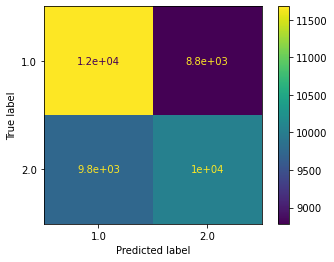

In [19]:
plot_confusion_matrix(model, x_test, y_test)  

In [20]:
# Logistic regression
model1 = LogisticRegression()
model1.fit(x_train, y_train.ravel())

#train_predict1 = model1.predict(x_train)
test_predict1 = model1.predict(x_test)
tn1, fp1, fn1, tp1  = confusion_matrix(y_test, test_predict1, labels=[2, 1]).ravel()
print(tn1, fp1, fn1, tp1)

accuracy1 = (tp1+tn1)/(tp1+tn1+fp1+fn1)
specificity1 = tn1/(fp1+tn1)
precision1 = tp1/(tp1+fp1)
recall1 = tp1/(tp1+fn1)
fscore1 = 2*tp1/(2*tp1+fp1+fn1)

print(accuracy1)
print(specificity1)
print(precision1)
print(recall1)
print(fscore1)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


4058 15745 2964 17498
0.5353532844902521
0.20491844669999495
0.5263664530878681
0.855146124523507
0.6516339260776464


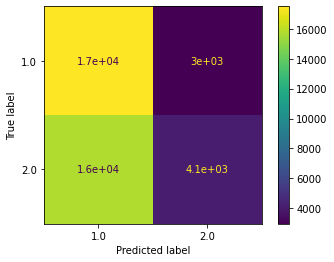

In [21]:
plot_confusion_matrix(model1, x_test, y_test)  

In [22]:
# Support vector machine (linear kernel)
model2 = LinearSVC()
model2.fit(x_train, y_train.ravel())

#train_predict2 = model2.predict(x_train)
test_predict2 = model2.predict(x_test)
tn2, fp2, fn2, tp2  = confusion_matrix(y_test, test_predict2, labels=[2, 1]).ravel()
print(tn2, fp2, fn2, tp2)

accuracy2 = (tp2+tn2)/(tp2+tn2+fp2+fn2)
specificity2 = tn2/(fp2+tn2)
precision2 = tp2/(tp2+fp2)
recall2 = tp2/(tp2+fn2)
fscore2 = 2*tp2/(2*tp2+fp2+fn2)

print(accuracy2)
print(specificity2)
print(precision2)
print(recall2)
print(fscore2)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


4103 15700 3004 17458
0.5354774618154725
0.20719082967227187
0.5265094396525726
0.8531912813996677
0.6511749347258485


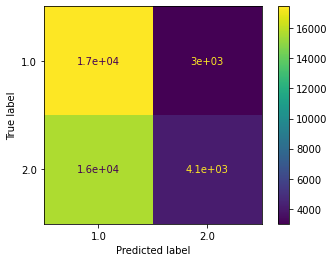

In [23]:
plot_confusion_matrix(model2, x_test, y_test) 

In [ ]:
'''
# Support vector machine (polynomial kernel)
model3 = SVC(kernel="poly")
model3.fit(x_train, y_train.ravel())

#train_predict3 = model3.predict(x_train)
test_predict3 = model3.predict(x_test)
tn3, fp3, fn3, tp3  = confusion_matrix(y_test, test_predict3, labels=[2, 1]).ravel()
print(tn3, fp3, fn3, tp3)

accuracy3 = (tp3+tn3)/(tp3+tn3+fp3+fn3)
specificity3 = tn3/(fp3+tn3)
precision3 = tp3/(tp3+fp3)
recall3 = tp3/(tp3+fn3)
fscore3 = 2*tp3/(2*tp3+fp3+fn3)

print(accuracy3)
print(specificity3)
print(precision3)
print(recall3)
print(fscore3)
'''

'\n# Support vector machine (polynomial kernel)\nmodel3 = SVC(kernel="poly")\nmodel3.fit(x_train, y_train.ravel())\n\n#train_predict3 = model3.predict(x_train)\ntest_predict3 = model3.predict(x_test)\ntn3, fp3, fn3, tp3  = confusion_matrix(y_test, test_predict3, labels=[2, 1]).ravel()\nprint(tn3, fp3, fn3, tp3)\n\naccuracy3 = (tp3+tn3)/(tp3+tn3+fp3+fn3)\nspecificity3 = tn3/(fp3+tn3)\nprecision3 = tp3/(tp3+fp3)\nrecall3 = tp3/(tp3+fn3)\nfscore3 = 2*tp3/(2*tp3+fp3+fn3)\n\nprint(accuracy3)\nprint(specificity3)\nprint(precision3)\nprint(recall3)\nprint(fscore3)\n'

In [24]:
# K nearest neighbors
model4 = KNeighborsClassifier()
model4.fit(x_train, y_train.ravel())

#train_predict4 = model4.predict(x_train)
test_predict4 = model4.predict(x_test)
tn4, fp4, fn4, tp4  = confusion_matrix(y_test, test_predict4, labels=[2, 1]).ravel()
print(tn4, fp4, fn4, tp4)

accuracy4 = (tp4+tn4)/(tp4+tn4+fp4+fn4)
specificity4 = tn4/(fp4+tn4)
precision4 = tp4/(tp4+fp4)
recall4 = tp4/(tp4+fn4)
fscore4 = 2*tp4/(2*tp4+fp4+fn4)

print(accuracy4)
print(specificity4)
print(precision4)
print(recall4)
print(fscore4)

13091 6712 13083 7379
0.508381969452378
0.6610614553350502
0.5236675892413597
0.36061968527025706
0.4271119729111799


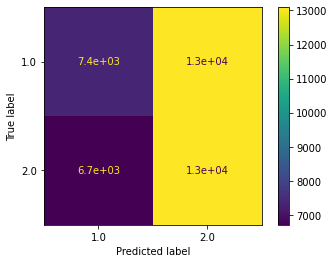

In [25]:
plot_confusion_matrix(model4, x_test, y_test) 